# Konfigurasi Wenner Schlumberger

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Done")

Done


In [2]:
df_WenSch = pd.read_csv("12112022_103819_SP_WenSchlumberger_WS Cimenyan.csv")
df_WenSch

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31800,∞;;;;;;;;;;;;;;;;
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.05600,∞;;;;;;;;;;;;;;;;
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.00100,∞;;;;;;;;;;;;;;;;
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.21800,∞;;;;;;;;;;;;;;;;
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.02000,∞;;;;;;;;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,9,0,0,14,15,∞,∞,130,140,0,0,0.01200,∞;;;;;;;;;;;;;;;;
117,118,10,0,0,11,12,∞,∞,100,110,0,0,0.02900,∞;;;;;;;;;;;;;;;;
118,119,10,0,0,12,13,∞,∞,110,120,0,0,0.01933,∞;;;;;;;;;;;;;;;;
119,120,10,0,0,13,14,∞,∞,120,130,0,0,0.01750,∞;;;;;;;;;;;;;;;;


### Menghitung nilai d dengan |"V1_RealPosition (m)"-"V2_RealPosition (m)"|

In [3]:
N = df_WenSch.shape[0]
d_list = []
for i in range(N):
    d_i = abs(df_WenSch["V1_RealPosition (m)"][i] - df_WenSch["V2_RealPosition (m)"][i])
    d_list.append(d_i)

### Membuat kolom "DResult (m)" pada dataframe

In [4]:
df_WenSch.insert(
    df_WenSch.shape[1],
    "DResult (m)",
    d_list,
    True
)

### Menghitung nilai E dengan "VResult (V)"/"DResult (m)"

In [5]:
N = df_WenSch.shape[0]
E_list = []
for i in range(N):
    E_i = (df_WenSch["VResult (V)"][i])/(df_WenSch["DResult (m)"][i])
    E_list.append(E_i)

### Membuat kolom "EResult (V/m)" pada dataframe

In [6]:
df_WenSch.insert(
    df_WenSch.shape[1], 
    "EResult (V/m)", 
    E_list, 
    True
)

df_WenSch

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;,DResult (m),EResult (V/m)
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31800,∞;;;;;;;;;;;;;;;;,10,0.031800
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.05600,∞;;;;;;;;;;;;;;;;,10,0.005600
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.00100,∞;;;;;;;;;;;;;;;;,10,0.000100
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.21800,∞;;;;;;;;;;;;;;;;,10,0.021800
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.02000,∞;;;;;;;;;;;;;;;;,10,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,9,0,0,14,15,∞,∞,130,140,0,0,0.01200,∞;;;;;;;;;;;;;;;;,10,0.001200
117,118,10,0,0,11,12,∞,∞,100,110,0,0,0.02900,∞;;;;;;;;;;;;;;;;,10,0.002900
118,119,10,0,0,12,13,∞,∞,110,120,0,0,0.01933,∞;;;;;;;;;;;;;;;;,10,0.001933
119,120,10,0,0,13,14,∞,∞,120,130,0,0,0.01750,∞;;;;;;;;;;;;;;;;,10,0.001750


In [7]:
data_E = df_WenSch["EResult (V/m)"]

### Menghitung rata-rata data Medan Listrik ("EResult (V/m)")

In [8]:
mean_E = data_E.mean()
mean_E

0.0038172066115702476

### Menentukan nilai puncak (peak) data Medan Listrik ("EResult (V/m)")

In [9]:
peak_E = data_E.max()
peak_E

0.0322

### Menghitung standar deviasi data Medan Listrik ("EResult (V/m)")

In [10]:
stdev_E = data_E.std()
stdev_E

0.006763221324336201

### Menghitung nilai P25, P50, dan P90 data Medan Listrik ("EResult (V/m)")

In [11]:
# P25
p25_E = np.percentile(data_E, 25)
p25_E

0.0012000000000000001

In [12]:
# P50
p50_E = np.percentile(data_E, 50)
p50_E

0.0017500000000000003

In [13]:
# P90
p90_E = np.percentile(data_E, 90)
p90_E

0.0056

### Membuat grafik distribusi Gaussian data Medan Listrik

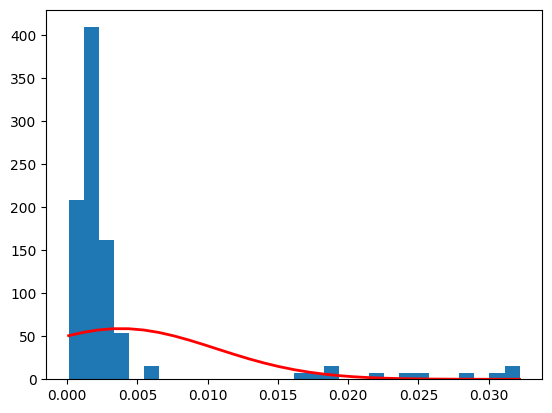

In [14]:
count, bins, ignored = plt.hist(data_E, 30, density=True)
plt.plot(
    bins, 
    (1/(stdev_E * np.sqrt(2*np.pi))) * np.exp( (-((bins - mean_E)**2)) / (2 * (stdev_E**2)) ),
    linewidth=2, 
    color='r'
)
plt.savefig("WenSch_gaussian_E.png")
plt.show()

### Menghitung nilai ENoise

In [15]:
N = df_WenSch.shape[0]
E_noise_list = []
for i in range(N):
    z = (data_E[i]-mean_E)/(stdev_E)
    E_noise_i = (z)*(stdev_E/(N**0.5))
    E_noise_list.append(E_noise_i)

### Membuat kolom "ENoise" pada dataframe

In [16]:
df_WenSch.insert(
    df_WenSch.shape[1], 
    "ENoise", 
    E_noise_list, 
    True
)

df_WenSch

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;,DResult (m),EResult (V/m),ENoise
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31800,∞;;;;;;;;;;;;;;;;,10,0.031800,0.002544
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.05600,∞;;;;;;;;;;;;;;;;,10,0.005600,0.000162
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.00100,∞;;;;;;;;;;;;;;;;,10,0.000100,-0.000338
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.21800,∞;;;;;;;;;;;;;;;;,10,0.021800,0.001635
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.02000,∞;;;;;;;;;;;;;;;;,10,0.002000,-0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,9,0,0,14,15,∞,∞,130,140,0,0,0.01200,∞;;;;;;;;;;;;;;;;,10,0.001200,-0.000238
117,118,10,0,0,11,12,∞,∞,100,110,0,0,0.02900,∞;;;;;;;;;;;;;;;;,10,0.002900,-0.000083
118,119,10,0,0,12,13,∞,∞,110,120,0,0,0.01933,∞;;;;;;;;;;;;;;;;,10,0.001933,-0.000171
119,120,10,0,0,13,14,∞,∞,120,130,0,0,0.01750,∞;;;;;;;;;;;;;;;;,10,0.001750,-0.000188


In [17]:
data_E_noise = df_WenSch["ENoise"]

### Menghitung rata-rata data noise ("ENoise")

In [18]:
mean_E_noise = data_E_noise.mean()
mean_E_noise

2.844910659207832e-20

### Menghitung nilai puncak data noise ("ENoise")

In [19]:
peak_E_noise = data_E_noise.max()
peak_E_noise

0.0025802539444027047

### Menghitung nilai standar deviasi data noise ("ENoise")

In [20]:
stdev_E_noise = data_E_noise.std()
stdev_E_noise

0.0006148383022123819

### Menghitung nilai P25, P50, dan P90 data Medan Listrik ("EResult (V/m)")

In [21]:
# P25
p25_E_noise = np.percentile(data_E_noise, 25)
p25_E_noise

-0.0002379278737791134

In [22]:
# P50
p50_E_noise = np.percentile(data_E_noise, 50)
p50_E_noise

-0.0001879278737791134

In [23]:
# P90
p90_E_noise = np.percentile(data_E_noise, 90)
p90_E_noise

0.00016207212622088658